# Test Task. Python 

The company provides partners with a service for making payments. One of the advantages over competitors is the large number of payment systems users can choose. 
Product management decided to add another payment system, assuming it would improve the user experience. 
The user path looks like this:

● the user opens a list with various payment systems (open-list) 

● Selects or does not select a payment system from the list (open-payment) 

● Creates a payment request or does not create (create-invoice) 

There cannot be a subsequent event without the previous one, but sometimes the data fails and events are lost. Sometimes user behaviour can differ among different segments (between ui_version platforms or countries, for example). 
To evaluate the effect of the changes, an A/B test was conducted. The new payment system was not shown to group A, but was shown to group B. 
Goals: 
1. Select a metric/metrics that will help evaluate the result of the experiment. 
2. Select a statistical method for evaluation. 
3. Write Python code to analyse the results. 
4. Write a report on the results and conclusions for a product manager who does not understand statistics. 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
# a command for seaborn plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Looking at the data

In [4]:
df = pd.read_csv('AB_New_Paysystem.csv')

In [5]:
df.head()

,internal_time,milliseconds,action,user_id,user_country,ui_version,experiment_group
0,2021-12-23 23:21:15,1640290775095,open-list,1030926598,BA,desktop,A
1,2021-12-23 23:21:15,1640290775166,open-payment,1030926598,BA,desktop,A
2,2021-12-23 16:53:45,1640267624524,open-list,2257656204,TN,mobile,A
3,2021-12-23 16:53:17,1640267596160,open-list,2257656204,TN,mobile,A
4,2021-12-23 23:58:53,1640293136656,open-list,3011476026,TN,desktop,A


In [6]:
# looking at a user and his actions
df[df['user_id'] == 3011476026].sort_values('milliseconds')

,internal_time,milliseconds,action,user_id,user_country,ui_version,experiment_group
873,2021-12-23 23:51:52,1640292715877,open-list,3011476026,TN,desktop,A
874,2021-12-23 23:51:53,1640292716205,open-payment,3011476026,TN,desktop,A
871,2021-12-23 23:52:19,1640292742894,open-list,3011476026,TN,desktop,A
872,2021-12-23 23:52:19,1640292742908,open-payment,3011476026,TN,desktop,A
535,2021-12-23 23:52:39,1640292762018,open-list,3011476026,TN,desktop,A
533,2021-12-23 23:52:43,1640292766532,open-payment,3011476026,TN,desktop,A
536,2021-12-23 23:53:51,1640292834625,open-payment,3011476026,TN,desktop,A
534,2021-12-23 23:53:59,1640292842656,create-invoice,3011476026,TN,desktop,A
3422,2021-12-23 23:57:25,1640293048261,open-list,3011476026,TN,desktop,A
3421,2021-12-23 23:57:25,1640293048324,open-payment,3011476026,TN,desktop,A


Looking at data in different groups

In [7]:
df.shape

(945428, 7)

In [8]:
# check that we don't have empty values
df.isna().sum()

internal_time       0
milliseconds        0
action              0
user_id             0
user_country        0
ui_version          0
experiment_group    0
dtype: int64

In [9]:
df.groupby('experiment_group').count()

,internal_time,milliseconds,action,user_id,user_country,ui_version
experiment_group,,,,,,
A,468818,468818,468818,468818,468818,468818
B,476610,476610,476610,476610,476610,476610


In [10]:
df.groupby(['ui_version', 'experiment_group']).count()

internal_time  milliseconds  action  user_id  \
ui_version experiment_group                                                 
desktop    A                        428008        428008  428008   428008   
           B                        431663        431663  431663   431663   
mobile     A                         40810         40810   40810    40810   
           B                         44947         44947   44947    44947   

                             user_country  
ui_version experiment_group                
desktop    A                       428008  
           B                       431663  
mobile     A                        40810  
           B                        44947

In [11]:
df.groupby(['user_country', 'experiment_group']).count()

internal_time  milliseconds  action  user_id  \
user_country experiment_group                                                 
BA           A                          1484          1484    1484     1484   
             B                          1430          1430    1430     1430   
BG           A                          7201          7201    7201     7201   
             B                          7389          7389    7389     7389   
BH           A                          2540          2540    2540     2540   
             B                          2594          2594    2594     2594   
BR           A                        161566        161566  161566   161566   
             B                        163303        163303  163303   163303   
BY           A                          3054          3054    3054     3054   
             B                          2864          2864    2864     2864   
EE           A                          7798          7798    7798     7798   
             B                          7556          7556    7556     7556   
FI           A                          6890          6890    6890     6890   
             B                          8304          8304    8304     8304   
FR           A                         51799         51799   51799    51799   
             B                         50777         50777   50777    50777   
GR           A                         12641         12641   12641    12641   
             B                         12148         12148   12148    12148   
HR           A                          5008          5008    5008     5008   
             B                          5132          5132    5132     5132   
HU           A                          8958          8958    8958     8958   
             B                          9995          9995    9995     9995   
IL           A                         17650         17650   17650    17650   
             B                         18561         18561   18561    18561   
KR           A                         85878         85878   85878    85878   
             B                         87621         87621   87621    87621   
KW           A                          4903          4903    4903     4903   
             B                          4983          4983    4983     4983   
KZ           A                          6178          6178    6178     6178   
             B                          6381          6381    6381     6381   
LT           A                          9932          9932    9932     9932   
             B                         10697         10697   10697    10697   
LV           A                          7116          7116    7116     7116   
             B                          6858          6858    6858     6858   
PK           A                          3245          3245    3245     3245   
             B                          3316          3316    3316     3316   
RS           A                          5762          5762    5762     5762   
             B                          6163          6163    6163     6163   
SA           A                         37080         37080   37080    37080   
             B                         37806         37806   37806    37806   
TN           A                          1065          1065    1065     1065   
             B                          1412          1412    1412     1412   
UA           A                         21070         21070   21070    21070   
             B                         21320         21320   21320    21320   

                               ui_version  
user_country experiment_group              
BA           A                       1484  
             B                       1430  
BG           A                       7201  
             B                       7389  
BH           A                       2540  
             B                       2594  
BR           A                     161566  


In [12]:
# check that we don't have users that use desktop AND mobile
print(set(df.user_id.iloc[df[(df['ui_version'] == 'desktop') & (df['experiment_group'] == 'A')].index]) \
      .intersection(set(df.user_id.iloc[df[(df['ui_version'] == 'mobile') & (df['experiment_group'] == 'A')].index])))
print(set(df.user_id.iloc[df[(df['ui_version'] == 'desktop') & (df['experiment_group'] == 'B')].index]) \
      .intersection(set(df.user_id.iloc[df[(df['ui_version'] == 'mobile') & (df['experiment_group'] == 'B')].index])))

set()
set()


I selected conversion rate (to created invoice) as a metric for helping evaluate the result of the experiment. The metric will be calculated as amount of users in the group that created at least one invoice divided by amount of all users in the group.

In [13]:
# creating a helping dataframe and renaming actions to simplify the conversion rate calculating
help_df = df.groupby(['user_id', 'experiment_group', 'user_country', 'ui_version', 'action'], as_index=False)['milliseconds'].count()
help_df['action'] = help_df.action.replace({'open-list': 1, 'open-payment': 2, 'create-invoice': 3})

In [14]:
help_df.head()

,user_id,experiment_group,user_country,ui_version,action,milliseconds
0,2655,B,IL,mobile,3,5
1,2655,B,IL,mobile,1,6
2,2655,B,IL,mobile,2,7
3,33026,A,KR,desktop,3,1
4,33026,A,KR,desktop,1,1


In [15]:
# we use ".max()" here to identify the last action of each user
# "action == 3" means that a user has created an invoice otherwise a user has not created an invoice
help_df = help_df.groupby(['user_id', 'experiment_group', 'user_country', 'ui_version'], as_index=False).action.max()
help_df.head()

,user_id,experiment_group,user_country,ui_version,action
0,2655,B,IL,mobile,3
1,33026,A,KR,desktop,3
2,69463,A,HU,desktop,3
3,101545,B,HR,desktop,3
4,162121,A,BR,desktop,2


In [16]:
# conversion rate for group A
len(help_df[(help_df['experiment_group'] == 'A') & (help_df['action'] == 3)]) / len(help_df[help_df['experiment_group'] == 'A'])

0.4967929276634187

In [17]:
# conversion rate for group B
len(help_df[(help_df['experiment_group'] == 'B') & (help_df['action'] == 3)]) / len(help_df[help_df['experiment_group'] == 'B'])

0.4990796909835641

Creating of contingency table for using chi-square test for contingency tables (in this case we also can use propotion z-test and the result will be the same but contingency tables are more visible in this case).

Null hypothesis: The new payment method does not affect the conversion

Alternative hypothesis: The new payment method affects the conversion

In [18]:
A_yes = len(help_df[(help_df['experiment_group'] == 'A') & (help_df['action'] == 3)])
A_no = len(help_df[help_df['experiment_group'] == 'A']) - A_yes
B_yes = len(help_df[(help_df['experiment_group'] == 'B') & (help_df['action'] == 3)])
B_no = len(help_df[help_df['experiment_group'] == 'B']) - B_yes

main_contingency_table = pd.DataFrame([[A_yes, A_no], [B_yes, B_no]],
                                 index=['A', 'B'],
                                 columns=['created_invoice', 'not_created_invoice'])
main_contingency_table

,created_invoice,not_created_invoice
A,38494,38991
B,38503,38645


In [19]:
result = stats.chi2_contingency(main_contingency_table)
print(f'p-value: {result[1]}')

p-value: 0.37124024590024396


The result is not statistically significant. So, we can't reject the null hypothesis.

Also, we can test differences across cohorts. Maybe the new payment method affects the conversion in one of the UI versions or in some countries.

In [20]:
# the function returns p-values of tests and also prints contingency tables
def test_ui_versions(ui_versions_list, dataframe):
    p_values = []
    for ui_version in ui_versions_list:
        A_yes = len(dataframe[(dataframe['experiment_group'] == 'A') & (dataframe['ui_version'] == ui_version) & (dataframe['action'] == 3)])
        A_no = len(dataframe[(dataframe['experiment_group'] == 'A') & (dataframe['ui_version'] == ui_version)]) - A_yes
        B_yes = len(dataframe[(dataframe['experiment_group'] == 'B') & (dataframe['ui_version'] == ui_version) & (dataframe['action'] == 3)])
        B_no = len(dataframe[(dataframe['experiment_group'] == 'B') & (dataframe['ui_version'] == ui_version)]) - B_yes
        main_contingency_table = pd.DataFrame([[A_yes, A_no], [B_yes, B_no]],
                                 index=['A', 'B'],
                                 columns=['created_invoice', 'not_created_invoice'])
        print(main_contingency_table)
        result = stats.chi2_contingency(main_contingency_table)
        p_values.append(result[1])
    return p_values

In [21]:
ui_versions_lst = list(df.ui_version.unique())

In [22]:
results_ui = test_ui_versions(ui_versions_lst, help_df)
results_ui

   created_invoice  not_created_invoice
A            35878                33767
B            35826                33380
   created_invoice  not_created_invoice
A             2616                 5224
B             2677                 5265


[0.3509092879665775, 0.6636703827417902]

The results are also not statistically significant in both versions of the user interface.

In [23]:
# the function returns p-values of tests and also prints contingency tables
def test_countries(countries_list, dataframe):
    p_values = []
    for country in countries_list:
        A_yes = len(dataframe[(dataframe['experiment_group'] == 'A') & (dataframe['user_country'] == country) & (dataframe['action'] == 3)])
        A_no = len(dataframe[(dataframe['experiment_group'] == 'A') & (dataframe['user_country'] == country)]) - A_yes
        B_yes = len(dataframe[(dataframe['experiment_group'] == 'B') & (dataframe['user_country'] == country) & (dataframe['action'] == 3)])
        B_no = len(dataframe[(dataframe['experiment_group'] == 'B') & (dataframe['user_country'] == country)]) - B_yes
        main_contingency_table = pd.DataFrame([[A_yes, A_no], [B_yes, B_no]],
                                 index=['A', 'B'],
                                 columns=['created_invoice', 'not_created_invoice'])
        print(main_contingency_table)
        result = stats.chi2_contingency(main_contingency_table)
        p_values.append(result[1])
    return p_values

In [24]:
countries_lst = list(df.user_country.unique())
countries_lst

['BA',
 'TN',
 'BG',
 'BH',
 'BR',
 'BY',
 'EE',
 'FI',
 'FR',
 'GR',
 'HR',
 'HU',
 'IL',
 'KR',
 'KW',
 'KZ',
 'LT',
 'LV',
 'PK',
 'RS',
 'SA',
 'UA']

In [25]:
results = test_countries(countries_lst, help_df)
results

   created_invoice  not_created_invoice
A               93                  139
B               76                  182
   created_invoice  not_created_invoice
A               40                  153
B               62                  170
   created_invoice  not_created_invoice
A              484                  486
B              494                  453
   created_invoice  not_created_invoice
A              224                  210
B              221                  186
   created_invoice  not_created_invoice
A            11965                17066
B            11672                17301
   created_invoice  not_created_invoice
A              275                  288
B              296                  271
   created_invoice  not_created_invoice
A              771                  392
B              744                  312
   created_invoice  not_created_invoice
A              867                  334
B              961                  353
   created_invoice  not_created_invoice


[0.01749098930233195,
 0.1842949851861832,
 0.34344726407508375,
 0.4770892619362972,
 0.023346900423369683,
 0.2847368996543493,
 0.039648592853564736,
 0.6263934757833,
 0.10445498718249596,
 0.7538789428343596,
 0.7611636013435239,
 0.7185876409795404,
 0.585858550536765,
 0.07156683045008962,
 0.7141982173111652,
 0.6074128496795704,
 0.6136947387345746,
 0.8595583119353156,
 0.9729654688779542,
 0.32433988271451875,
 0.21410779230854193,
 0.19665069999244822]

In [26]:
# "alpha" after Bonferroni correction
0.05 / len(results)

0.002272727272727273

<AxesSubplot:ylabel='Count'>

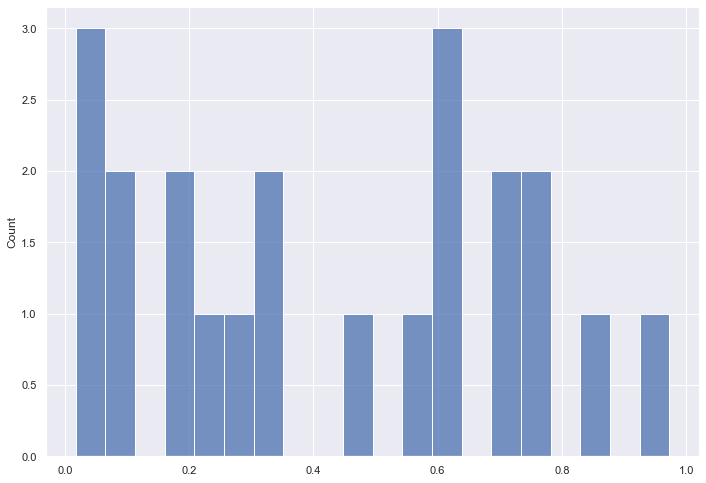

In [27]:
sns.histplot(results, bins=20)

We can see that all p-values are more than the "alpha" after Bonferroni correction (~0.002), so, the results are not statistically significant (at the 5% significance level).

Also, we can use bootstrap to look at the differences in the distributions of conversions in subsamples of groups A and B

In [28]:
# the function returns two arrays with conversion rates for group A and group B 
# size of subsamples is 10000, amount of subsamples is 1000
def bootstrap(group_A, group_B, n=10000, subsamples=1000):
    CR_A = []
    CR_B = []
    
    for _ in range(subsamples):
        group_A_sample = group_A.sample(n, replace=True)
        group_B_sample = group_B.sample(n, replace=True)
        conversion_rate_A = len(group_A_sample[group_A_sample['action'] == 3]) / len(group_A_sample)
        conversion_rate_B = len(group_B_sample[group_B_sample['action'] == 3]) / len(group_B_sample)
        CR_A.append(conversion_rate_A)
        CR_B.append(conversion_rate_B)
        
    return np.array(CR_A), np.array(CR_B)

In [29]:
cr_A, cr_B = bootstrap(help_df[help_df['experiment_group'] == 'A'], help_df[help_df['experiment_group'] == 'B'])
(cr_A[:10], cr_B[:10])

(array([0.5005, 0.5072, 0.5022, 0.4952, 0.4976, 0.4949, 0.4912, 0.4981,
        0.4983, 0.4974]),
 array([0.4933, 0.4965, 0.5064, 0.5013, 0.5034, 0.5009, 0.5018, 0.4959,
        0.502 , 0.4992]))

In [30]:
diff = cr_A - cr_B

In [31]:
print(np.mean(cr_A), np.mean(cr_B), np.mean(diff))

0.4970313 0.49897199999999997 -0.001940699999999999


<AxesSubplot:ylabel='Count'>

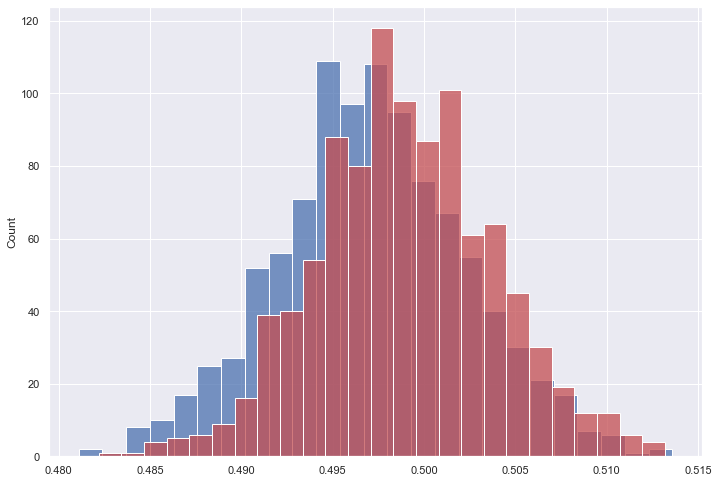

In [32]:
sns.histplot(cr_A)
sns.histplot(cr_B, color='r')

<AxesSubplot:ylabel='Count'>

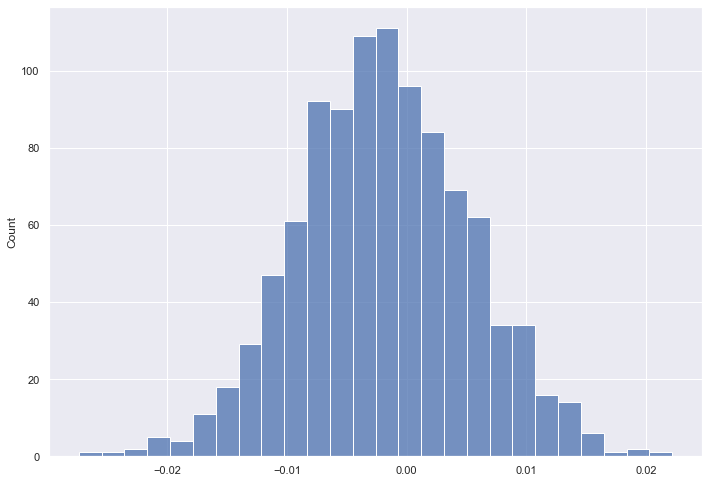

In [33]:
sns.histplot(diff)

In [34]:
stats.t.interval(0.95, len(diff)-1, loc=np.mean(diff), scale=np.std(diff))

(-0.016081890475890138, 0.01220049047589014)

We can see that zero is in the confidence interval. So, we can't reject the null hypothesis.

# A short report for a product manager

To evaluate the effect of the changes, the conversion rate (to created invoice) was selected as a metric. The data was analyzed in full and also by country and by UI-version separately.

According to the results of the A/B test, increase of the conversion rate was not identified (the results were not statistically significant).

So, I would not add the new payment system.